# Solvro recruiment spring 2025 - EDA + Clustering on Cocktail Dataset 🍸

# 📚 Libraries import 📚

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# 🗃️ Dataset download 🗃️

In [310]:
df=pd.read_json('cocktail_dataset.json')

# 📊 EDA 📊 

In [311]:
df.head(3)

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."


In [312]:
df.shape

(134, 11)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            134 non-null    int64 
 1   name          134 non-null    object
 2   category      134 non-null    object
 3   glass         134 non-null    object
 4   tags          35 non-null     object
 5   instructions  134 non-null    object
 6   imageUrl      134 non-null    object
 7   alcoholic     134 non-null    int64 
 8   createdAt     134 non-null    object
 9   updatedAt     134 non-null    object
 10  ingredients   134 non-null    object
dtypes: int64(2), object(9)
memory usage: 11.6+ KB


In [314]:
df.isna().sum()

id               0
name             0
category         0
glass            0
tags            99
instructions     0
imageUrl         0
alcoholic        0
createdAt        0
updatedAt        0
ingredients      0
dtype: int64

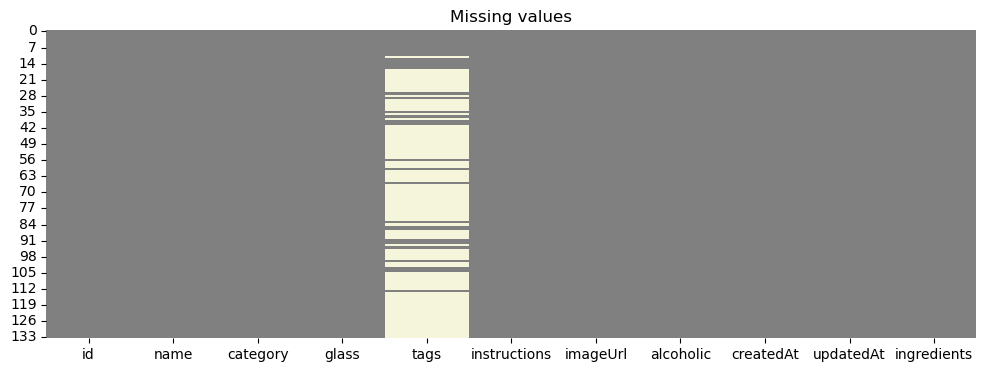

In [315]:
plt.figure(figsize=(12,4))
plt.title("Missing values")
sns.heatmap(df.isnull(),cmap=['grey','beige'], cbar=False)
plt.show()

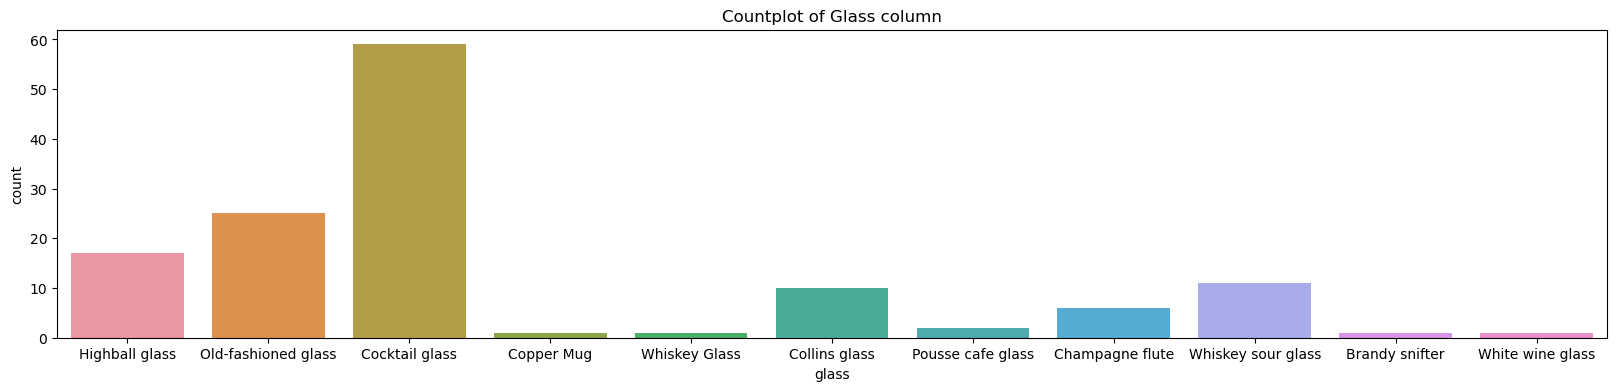

In [316]:
plt.figure(figsize=(20, 4))
plt.title("Countplot of Glass column")
sns.countplot(x="glass", data=df) 
plt.show()

# 🧹 Dataset cleaning & Extracting values 🧹

In [317]:
def extract_unique_tags():
    unique_tags=[]
    for value in df['tags']:
        if value!=None:
            for tag in value:
                if tag not in unique_tags:
                    unique_tags.append(tag)
        return unique_tags
        
def encode_tags():
    for tag in tags:
        values=[]
        for value in df['tags']:
            if value!=None and tag in value:
                values.append(1)
            else:
                values.append(0)
        df[tag]=values
    return df

tags=extract_unique_tags() 
df=encode_tags()

In [318]:
df['ingredients_types_list'] = df['ingredients'].apply(lambda x: [ingredient['type'] for ingredient in x])
df['ingredients_types_list'] = df['ingredients_types_list'].apply(lambda x: [ingredient for ingredient in x if ingredient!=None])

In [319]:
def extract_unique_types():
    unique_ingredients_types=[]
    for value in df['ingredients_types_list']:
        for ingred_type in value:
            if ingred_type not in unique_ingredients_types:
                unique_ingredients_types.append(ingred_type)
    return unique_ingredients_types
def encode_types():
    for type in types:
        values=[]
        for value in df['ingredients_types_list']:
            if value!=None and type in value:
                values.append(1)
            else:
                values.append(0)
        df[type]=values
    return df
types=extract_unique_types()
df=encode_types()

In [320]:
ingred_type_count={}
for ingred_type in types:
    if df[ingred_type].sum()>10:
        ingred_type_count[ingred_type]=df[ingred_type].sum()    

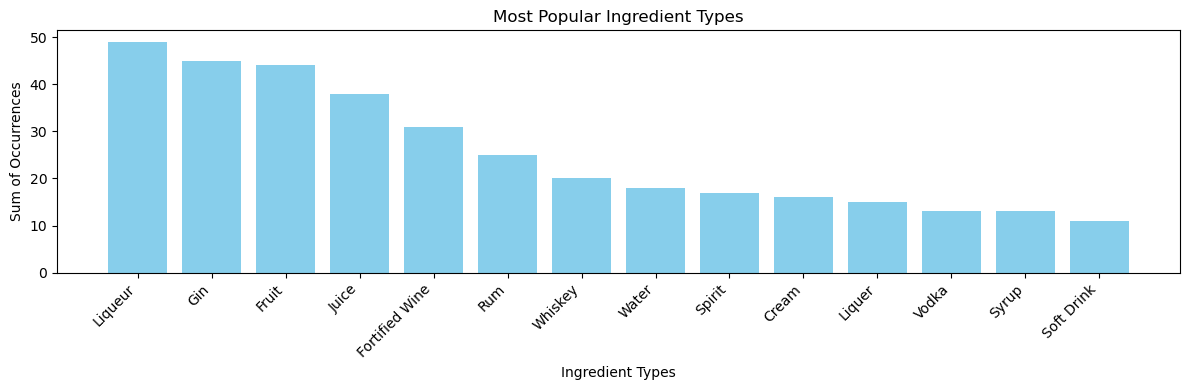

In [321]:
sorted_ingred_types = sorted(ingred_type_count.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_ingred_types)

plt.figure(figsize=(12, 4))
plt.bar(labels, values, color='skyblue')
plt.title('Most Popular Ingredient Types')
plt.xlabel('Ingredient Types')
plt.ylabel('Sum of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [322]:
tags_count={}
for tag in tags:
    tags_count[tag]=df[tag].sum()    

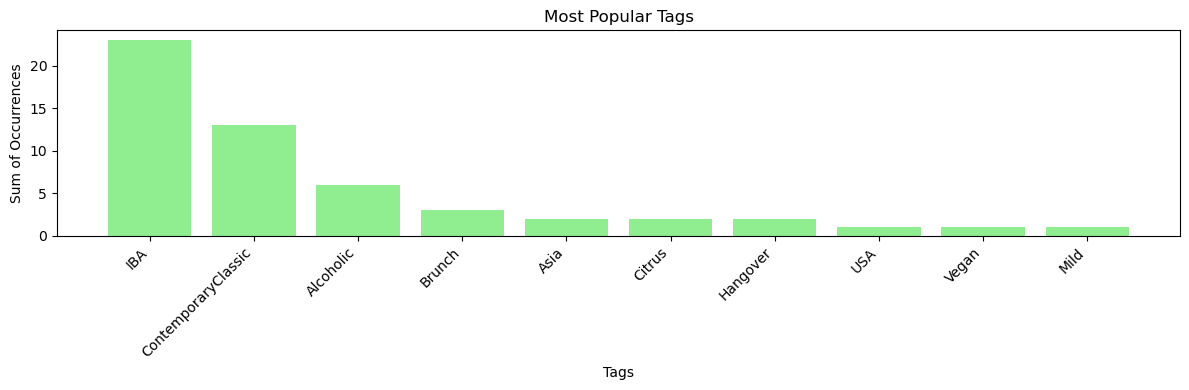

In [323]:
sorted_tags_count = sorted(tags_count.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_tags_count)

plt.figure(figsize=(12, 4))
plt.bar(labels, values, color='lightgreen')
plt.title('Most Popular Tags')
plt.xlabel('Tags')
plt.ylabel('Sum of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📝 Features Selection 📝

In [324]:
names=df['name']
id=df['id']
df=df.drop(['id','tags','name', 'imageUrl','instructions','alcoholic', 'createdAt', 'updatedAt', 'ingredients', 'ingredients_types_list'],axis=1)

In [325]:
for col in df.select_dtypes(include='number').columns.tolist():
    if df[col].sum()<12:
        df.drop(col, axis=1, inplace=True)

In [326]:
preprocessing = ColumnTransformer([
    ('encoding', OneHotEncoder(), ['category','glass'])
],remainder='passthrough')

# 🤖 Algorithm selection 🤖

In [327]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
X = preprocessing.fit_transform(df)

algorithms = [
    ('KMeans', KMeans(n_clusters=3, random_state=42)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=3)),
    ('Spectral', SpectralClustering(n_clusters=3, random_state=42))
]

results = {}

for name, algo in algorithms:
    algo.fit(X)
    
    if hasattr(algo, 'predict'):
        labels = algo.predict(X)
    else:
        labels = algo.labels_
    
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    
    results[name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    }

for name, scores in results.items():
    print(f"{name}:")
    print(f"  Silhouette Score: {scores['Silhouette Score']:.4f}")
    print(f"  Davies-Bouldin Index: {scores['Davies-Bouldin Index']:.4f}")
    print(f"  Calinski-Harabasz Index: {scores['Calinski-Harabasz Index']:.4f}\n")


KMeans:
  Silhouette Score: 0.1205
  Davies-Bouldin Index: 2.3646
  Calinski-Harabasz Index: 16.5315

Agglomerative:
  Silhouette Score: 0.0910
  Davies-Bouldin Index: 2.7033
  Calinski-Harabasz Index: 13.0110

Spectral:
  Silhouette Score: 0.1336
  Davies-Bouldin Index: 2.0991
  Calinski-Harabasz Index: 12.7557



# 🔢 N_Clusters Selection 🔢

In [328]:
silhouettes = []
davies_bouldins = []
calinski_harabaszs = []

for n_clusters in range(2, 11):
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
    spectral.fit(X)
    labels = spectral.labels_
    
        silhouettes.append(silhouette_score(X, labels))
    davies_bouldins.append(davies_bouldin_score(X, labels))
    calinski_harabaszs.append(calinski_harabasz_score(X, labels))

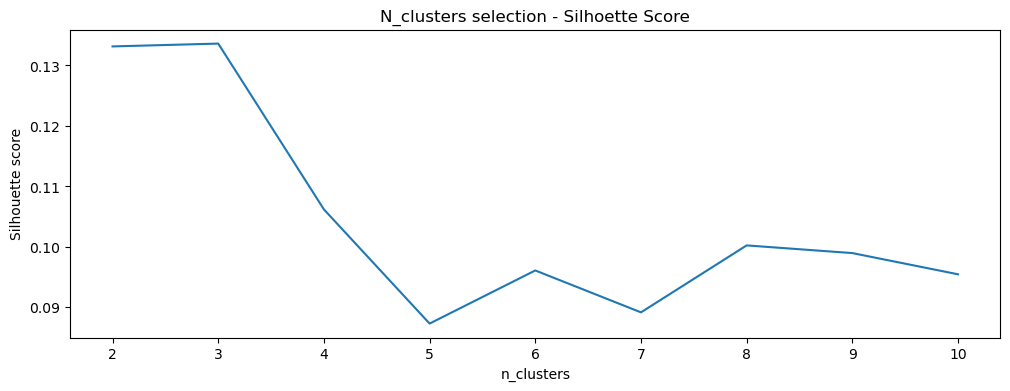

In [329]:
plt.figure(figsize=(12,4))
plt.title("N_clusters selection - Silhoette Score")
plt.plot(range(2,11),silhouettes)
plt.xlabel("n_clusters")
plt.ylabel("Silhouette score")
plt.show()

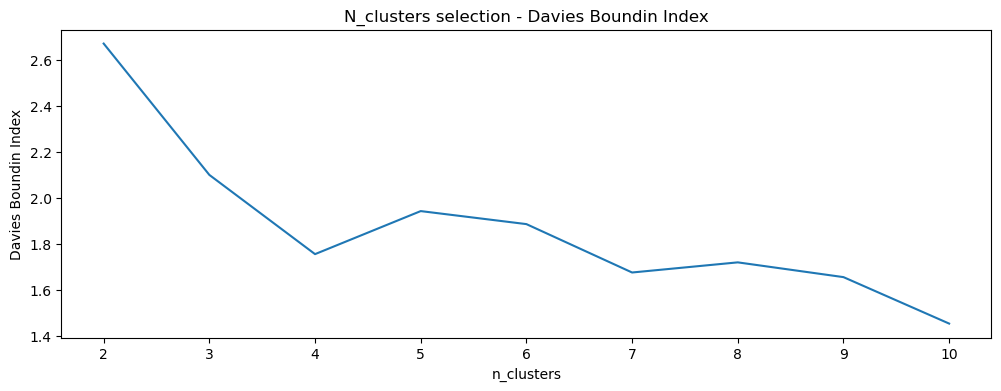

In [330]:
plt.figure(figsize=(12,4))
plt.title("N_clusters selection - Davies Boundin Index")
plt.plot(range(2,11),davies_bouldins)
plt.xlabel("n_clusters")
plt.ylabel("Davies Boundin Index")
plt.show()

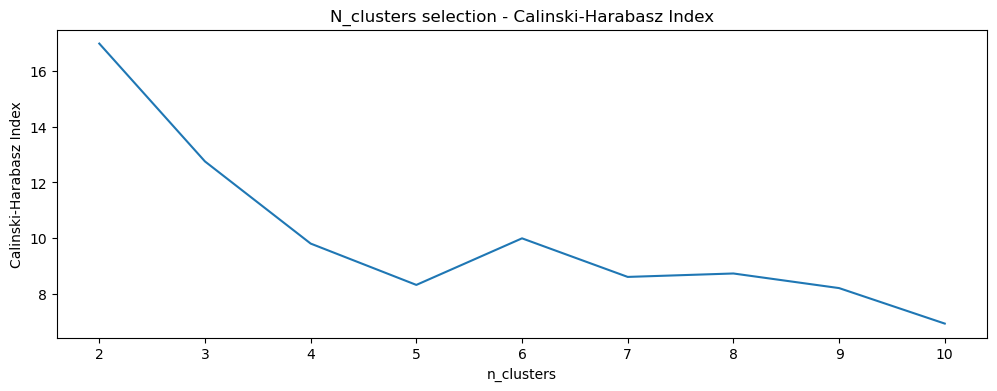

In [331]:
plt.figure(figsize=(12,4))
plt.title("N_clusters selection - Calinski-Harabasz Index")
plt.plot(range(2,11),calinski_harabaszs)
plt.xlabel("n_clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

# 📈 Final clustering & Visualization (PCA) 📉

In [332]:
spectral=SpectralClustering(n_clusters=3)
spectral.fit(X)
labels=spectral.labels_

In [333]:
from sklearn.decomposition import PCA
colors_dict = {0: 'blue', 1: 'green', 2: 'black'}
colors = [colors_dict[label] for label in labels]
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)

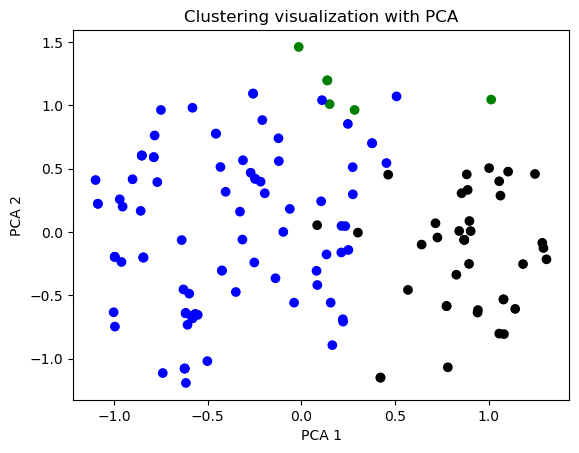

Preserved variance: 0.287


In [334]:
plt.title("Clustering visualization with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.show()
print(f"Preserved variance: {np.sum(pca.explained_variance_ratio_):.3f}")

In [335]:
df=pd.read_json('cocktail_dataset.json')
df['cluster']=labels

In [336]:
df.to_json('clustered_cocktails.json')